In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df_olist_leads = pd.read_csv("../Sri_CapstoneProject_Olist/olist_marketing_qualified_leads_dataset.csv")
df_closed_leads = pd.read_csv("../Sri_CapstoneProject_Olist/olist_closed_deals_dataset.csv")
df_products = pd.read_csv("../Sri_CapstoneProject_Olist/products table with product category in  in english.csv")
df_orders_items = pd.read_csv("../Sri_CapstoneProject_Olist/olist_order_items_dataset.csv")

In [2]:
df_olist_leads.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,d9f1f4dc0015d78e977e427cbc75736a,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


## Vital stats for Olist
#### no nulls except 60 records that lack 'origin' information
#### 8000 unique Marketing Qualified Lead (MQL) a.k.a seller at Olist
#### 336 distinct days where sellers make first contact - Olist can expect MQL at any time of year
#### 495 unique landing pages
#### 10 distinct modes of origin
#### Best performing origin mode is organic search - bringing in 2296 of 8000 mqls (28.7% of all mqls) 
#### Best performing landing page id is b76ef37428e6799c421989521c0e5077 - bringing in 912 mqls

In [3]:
df_olist_leads.head(5)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


#### What are the origin modes? 

In [4]:
#grouping by Origin modes
origin_modes = df_olist_leads.groupby("origin")["mql_id"].count()
origin_modes

origin
direct_traffic        499
display               118
email                 493
organic_search       2296
other                 150
other_publicities      65
paid_search          1586
referral              284
social               1350
unknown              1099
Name: mql_id, dtype: int64

In [5]:
df_olist_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [6]:
df_olist_leads.dtypes

mql_id                object
first_contact_date    object
landing_page_id       object
origin                object
dtype: object

In [7]:
df_olist_leads['first_contact_date'] = pd.to_datetime(df_olist_leads['first_contact_date'])

In [8]:
df_olist_leads['first_month_year'] = df_olist_leads['first_contact_date'].dt.strftime('%Y_%m')

In [9]:
df_olist_leads.head()

,mql_id,first_contact_date,landing_page_id,origin,first_month_year
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2018_02
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,2017_10
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,2018_03
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,2018_01
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018_02


In [10]:
df_olist_leads.dtypes

mql_id                        object
first_contact_date    datetime64[ns]
landing_page_id               object
origin                        object
first_month_year              object
dtype: object

In [11]:
origin_labels = ['direct_traffic', 'display', 'email', 'organic_search', 'other', 'other_publicities', 'paid_search', 'referral', 'social', 'unknown']


#### Which Origin mode perform best for Olist in acquiring MQLs ?

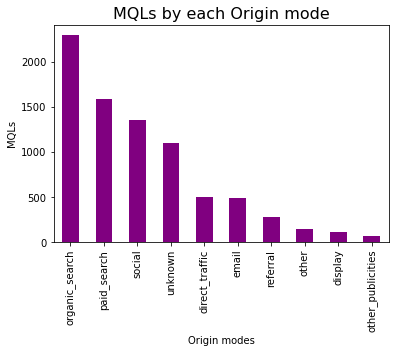

In [12]:
df_olist_leads['origin'].value_counts().plot(kind='bar', color = 'purple') 
plt.title("MQLs by each Origin mode", fontsize=16)
plt.xlabel ("Origin modes")
plt.ylabel ("MQLs")
# saving bar plot

plt.savefig("Originmodes_bar_Chart.png");

In [13]:
origin_mqls_timeseries = pd.DataFrame({'count' : df_olist_leads[['origin', 'first_month_year']].groupby(['origin','first_month_year']).size()}).reset_index()

In [14]:
origin_mqls_timeseries

,origin,first_month_year,count
0,direct_traffic,2017_07,16
1,direct_traffic,2017_08,22
2,direct_traffic,2017_09,22
3,direct_traffic,2017_10,23
4,direct_traffic,2017_11,26
...,...,...,...
108,unknown,2018_01,151
109,unknown,2018_02,156
110,unknown,2018_03,186
111,unknown,2018_04,166


#### MQLs acquisition patterns by Origin mode across 07/2017 to 05/2018

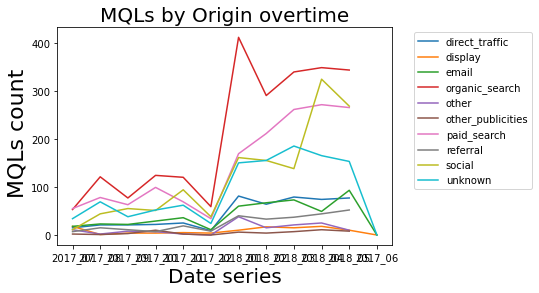

In [15]:
sns.lineplot(data=origin_mqls_timeseries, x='first_month_year', y='count',hue='origin')
plt.title("MQLs by Origin overtime", fontsize = 20)
plt.xlabel("Date series",fontsize = 20)
plt.ylabel(" MQLs count",fontsize = 22)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
plt.savefig("origin_timeseries.png");

#### MQLs via Organic search has been the top source and has spiked since 01/2018 -
#### Means Olist audiences are predominantly through the free world wide web
#### Effective marketing approach to reach this audience for Olist : is to do search engine optimization and match keywords for Olist Advertisements 
#### This will lead to increasing sellers on Olist and increase in Olist revenue  

In [16]:
df_closed_leads.describe()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type
count,842,842,842,842,842,841,836,665,832
unique,842,842,32,22,824,33,8,9,3
top,ac68bc93ecc07d7daec8ce924ca09b0c,cc63f0dd2acba93ffed4fe9f8e0321fa,4b339f9567d060bcea4f5136b9f5949e,4ef15afb4b2723d8f3d81e51ec7afefe,2018-05-04 03:00:00,home_decor,online_medium,cat,reseller
freq,1,1,140,133,6,105,332,407,587


## Vital stats for Olist
#### The df_closed_leads dataset contains 842 MQLs who won a deal with Olist successfully. 
#### No. sales development representatives (sdr_id) = 32
#### No. distinct sales representative(sr_id) = 22
#### 8 different lead types
#### 33 business segments
####  top business types = 2 (manufacturer, reseller)
###### For each won deal of Olist, key details are mql_id of the merchant with their Olist seller_id, won_date, business segment, lead_type, sdr_id and sr_id in charge of the deal, and business_type. 

In [17]:
df_closed_leads.dtypes

mql_id                    object
seller_id                 object
sdr_id                    object
sr_id                     object
won_date                  object
business_segment          object
lead_type                 object
lead_behaviour_profile    object
business_type             object
dtype: object

In [18]:
df_closed_leads['won_date'] = pd.to_datetime(df_closed_leads['won_date'])

In [19]:
df_closed_leads['Won_Month_Year'] = df_closed_leads['won_date'].dt.strftime('%Y_%m')

In [20]:
df_closed_leads.dtypes

mql_id                            object
seller_id                         object
sdr_id                            object
sr_id                             object
won_date                  datetime64[ns]
business_segment                  object
lead_type                         object
lead_behaviour_profile            object
business_type                     object
Won_Month_Year                    object
dtype: object

In [21]:
df_closed_leads.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,Won_Month_Year
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,2018_02
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,2018_05
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,2018_06
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,reseller,2018_01
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,2018_07


#### What are the different lead types impacting Olist? 

In [22]:
lead_types = df_closed_leads.groupby("lead_type")["mql_id"].count()
lead_types

lead_type
industry           123
offline            104
online_beginner     57
online_big         126
online_medium      332
online_small        77
online_top          14
other                3
Name: mql_id, dtype: int64

#### Which lead types bring in successful MQLS for Olist? 

<AxesSubplot:xlabel='lead_type'>

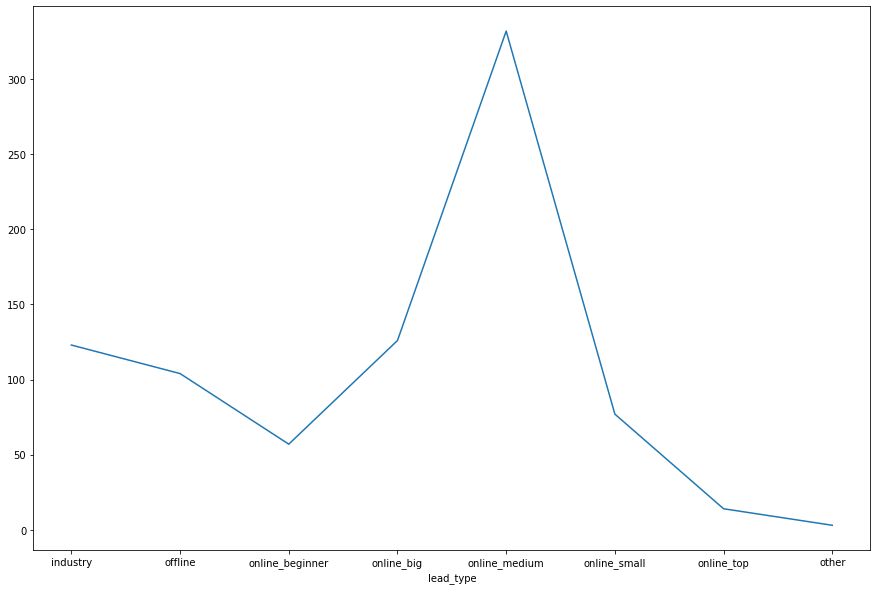

In [23]:
lead_types.plot.line(figsize = (15,10))

#### How have the different leadtypes performed over the years?

In [24]:
leadtype_mqls_timeseries = pd.DataFrame({'count' : df_closed_leads[['lead_type', 'Won_Month_Year']].groupby(['lead_type', 'Won_Month_Year']).size()}).reset_index()

In [25]:
leadtype_mqls_timeseries

,lead_type,Won_Month_Year,count
0,industry,2017_12,1
1,industry,2018_01,14
2,industry,2018_02,15
3,industry,2018_03,18
4,industry,2018_04,24
...,...,...,...
65,online_top,2018_03,2
66,online_top,2018_04,5
67,online_top,2018_05,2
68,online_top,2018_06,2


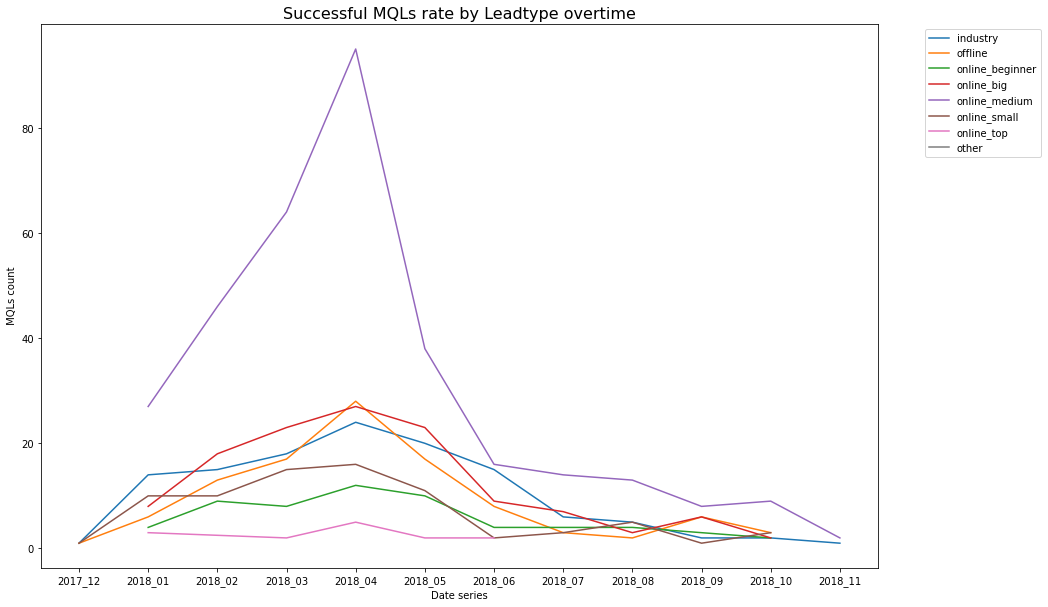

In [26]:
sns.lineplot(data=leadtype_mqls_timeseries, x='Won_Month_Year', y='count',hue='lead_type')
plt.title("Successful MQLs rate by Leadtype overtime", fontsize = 16)
plt.xlabel("Date series")
plt.ylabel(" MQLs count")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.savefig("Leadtype_timeseries.png");

#### What are the business types? How does this relate to successful MQLS  ?

In [27]:
#grouping by business type
business_types = df_closed_leads[['Won_Month_Year', 'mql_id', 'business_type']].groupby("business_type").count()
business_types

,Won_Month_Year,mql_id
business_type,,
manufacturer,242,242
other,3,3
reseller,587,587


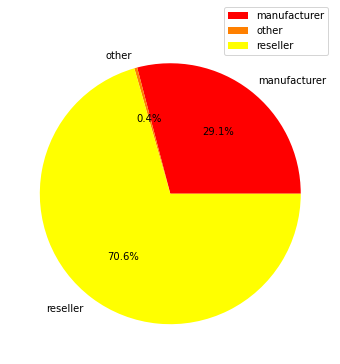

In [28]:
business_types.plot( x= 'index', kind = 'pie', y = 'Won_Month_Year', figsize=[16,6], colormap='autumn', autopct='%1.1f%%', ylabel="")
labels = ['manufacturer', 'other', 'reseller']
plt.legend(labels, bbox_to_anchor=(1,1), loc="right")

### Vital stats for Olist 
#### Sales from Resellers dominate in the Olist marketplace
#### Future potential MQLs who are resellers with a niche product would out do their competitors in sales  

In [29]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name:1,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0,utilidades_domesticas,housewares


### Total number of products being sold in the Olist marketplace? 

In [30]:
df_products['product_id'].count()

32328

### How many product categories in total at Olist marketplace ? Which product categories are dominant in products for MQLS and Olist? 

In [31]:
df_products['totals']= df_products.groupby(['product_category_name_english'])['product_id'].transform('count')

In [32]:
df_products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name:1,product_category_name_english,totals
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,perfumaria,perfumery,868
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0,artes,art,55
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0,esporte_lazer,sports_leisure,2867
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0,bebes,baby,919
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0,utilidades_domesticas,housewares,2335


In [33]:
df_products[['product_category_name_english','totals']].groupby(['product_category_name_english']).count()

,totals
product_category_name_english,
agro_industry_and_commerce,74
air_conditioning,124
art,55
arts_and_craftmanship,19
audio,58
...,...
stationery,849
tablets_printing_image,9
telephony,1134


### Total 71 product categories sorted by most number of unique products

In [34]:
product_category =  pd.DataFrame(df_products[['product_category_name_english','totals']].groupby(['product_category_name_english']).count().sort_values('totals', ascending=False).reset_index())


In [35]:
product_category.head(100)

,product_category_name_english,totals
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,home_comfort_2,5
68,fashion_childrens_clothes,5
69,security_and_services,2


### Top 20 Product categories with abundant products available at Olist

In [36]:
product_category[:20]

,product_category_name_english,totals
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


In [37]:
df_orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [38]:
df_orders_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

### Total orders for product items sold at Olist

In [39]:
df_orders_items['number_sold'] = df_orders_items.groupby(['product_id'])['order_id'].transform('count')

In [40]:
df_orders_items[['product_id','number_sold']].groupby(['product_id']).count().sort_values('number_sold', ascending=False)

,number_sold
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
...,...
6ca99f05e9c1952a6597264e87f01378,1
6ca54e191592a843087a042b0665d7ef,1
6ca5428af5edb5066b1966ad58501b60,1


In [41]:
products_with_sales  =  pd.DataFrame(df_orders_items[['product_id','number_sold']].groupby(['product_id']).count().sort_values('number_sold', ascending=False).reset_index())


### Top 20 product items frequently sold at Olist marketplace

In [42]:
products_with_sales.sort_values('number_sold', ascending=False)[:20]

,product_id,number_sold
0,aca2eb7d00ea1a7b8ebd4e68314663af,527
1,99a4788cb24856965c36a24e339b6058,488
2,422879e10f46682990de24d770e7f83d,484
3,389d119b48cf3043d311335e499d9c6b,392
4,368c6c730842d78016ad823897a372db,388
5,53759a2ecddad2bb87a079a1f1519f73,373
6,d1c427060a0f73f6b889a5c7c61f2ac4,343
7,53b36df67ebb7c41585e8d54d6772e08,323
8,154e7e31ebfa092203795c972e5804a6,281
9,3dd2a17168ec895c781a9191c1e95ad7,274


### Merging orders and products dataframes to analyse revenue by top product sold and product categories

In [43]:

orders_product_id_category = pd.merge(left = df_products[['product_id', 'product_category_name_english']], right = df_orders_items[['order_id', 'product_id', 'price', 'freight_value']], on = "product_id")
orders_product_id_category

,product_id,product_category_name_english,order_id,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,8.29
...,...,...,...,...,...
111018,83808703fc0706a22e264b9d75f04a2e,computers_accessories,59e88b7d3675e89aceaf86f372d3bc9a,29.90,16.11
111019,83808703fc0706a22e264b9d75f04a2e,computers_accessories,6e4465d771f02e4fe335225de3c6c043,29.90,23.28
111020,83808703fc0706a22e264b9d75f04a2e,computers_accessories,6e4465d771f02e4fe335225de3c6c043,29.90,23.28
111021,83808703fc0706a22e264b9d75f04a2e,computers_accessories,6e4465d771f02e4fe335225de3c6c043,29.90,23.28


In [44]:
orders_product_id_category.dtypes

product_id                        object
product_category_name_english     object
order_id                          object
price                            float64
freight_value                    float64
dtype: object

### Total Orders by Product category 

In [45]:

orders_product_id_category['order_counts'] = orders_product_id_category.groupby(['product_category_name_english'])['order_id'].transform('count')

In [46]:
orders_product_id_category.head()

,product_id,product_category_name_english,order_id,price,freight_value,order_counts
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,10.91,7.39,3419
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,248.00,17.99,209
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,79.80,7.82,8641
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,112.30,9.54,3065
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,8.29,6964


In [47]:
orders_product_id_category[['product_category_name_english','order_counts']].groupby(['product_category_name_english']).count().sort_values('order_counts', ascending=False)

,order_counts
product_category_name_english,
bed_bath_table,11115
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827
...,...
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14


In [48]:
#df_orders_items[['product_id','number_sold']].groupby(['product_id']).count().sort_values('number_sold', ascending=False)
Top_orders_product_category = pd.DataFrame(orders_product_id_category[['product_category_name_english','order_counts']].groupby(['product_category_name_english']).count().sort_values('order_counts', ascending=False)).reset_index()

In [49]:
Top_orders_product_category

,product_category_name_english,order_counts
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


### Top 10 product categories with the most orders

In [50]:
Top_orders_product_category.head(10)

,product_category_name_english,order_counts
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


### Total revenue by Product category 

In [51]:
orders_product_id_category ['sum_revenue'] = orders_product_id_category[['product_category_name_english','price']].groupby(['product_category_name_english'])['price'].transform('sum')

In [52]:
Top_orders_product_category_revenue = orders_product_id_category[['product_category_name_english','sum_revenue']].groupby(['product_category_name_english']).sum().sort_values('sum_revenue', ascending=False)

In [53]:
Top_orders_product_category_revenue = pd.DataFrame(orders_product_id_category[['product_category_name_english','sum_revenue']].groupby(['product_category_name_english']).sum()).reset_index()

In [54]:
Top_orders_product_category_revenue.sort_values('sum_revenue', ascending=False)

,product_category_name_english,sum_revenue
43,health_beauty,1.217145e+10
7,bed_bath_table,1.152613e+10
65,sports_leisure,8.537731e+09
70,watches_gifts,7.219189e+09
15,computers_accessories,7.137866e+09
...,...,...
52,la_cuisine,2.876986e+04
46,home_comfort_2,2.280810e+04
11,cds_dvds_musicals,1.022000e+04
29,fashion_childrens_clothes,4.558800e+03


### Top 20 Product categories by greatest sales revenue

In [55]:
Top_orders_product_category_revenue[:20]

,product_category_name_english,sum_revenue
0,agro_industry_and_commerce,1.537646e+07
1,air_conditioning,1.634241e+07
2,art,5.058352e+06
3,arts_and_craftmanship,4.353624e+04
4,audio,1.845061e+07
5,auto,2.510170e+09
6,baby,1.262059e+09
7,bed_bath_table,1.152613e+10
8,books_general_interest,2.591185e+07
9,books_imported,2.783910e+05


### Merging dataframes : Total revenue by Product category , Total Orders by Product category 


In [56]:
all_orders_revenue_product_category = pd.merge(Top_orders_product_category_revenue, Top_orders_product_category, how='left', on = ['product_category_name_english'])

In [57]:
all_orders_revenue_product_category

,product_category_name_english,sum_revenue,order_counts
0,agro_industry_and_commerce,1.537646e+07,212
1,air_conditioning,1.634241e+07,297
2,art,5.058352e+06,209
3,arts_and_craftmanship,4.353624e+04,24
4,audio,1.845061e+07,364
...,...,...,...
66,stationery,5.812841e+08,2517
67,tablets_printing_image,6.248580e+05,83
68,telephony,1.471069e+09,4545
69,toys,1.992408e+09,4117


In [58]:
all_orders_revenue_product_category.dtypes

product_category_name_english     object
sum_revenue                      float64
order_counts                       int64
dtype: object

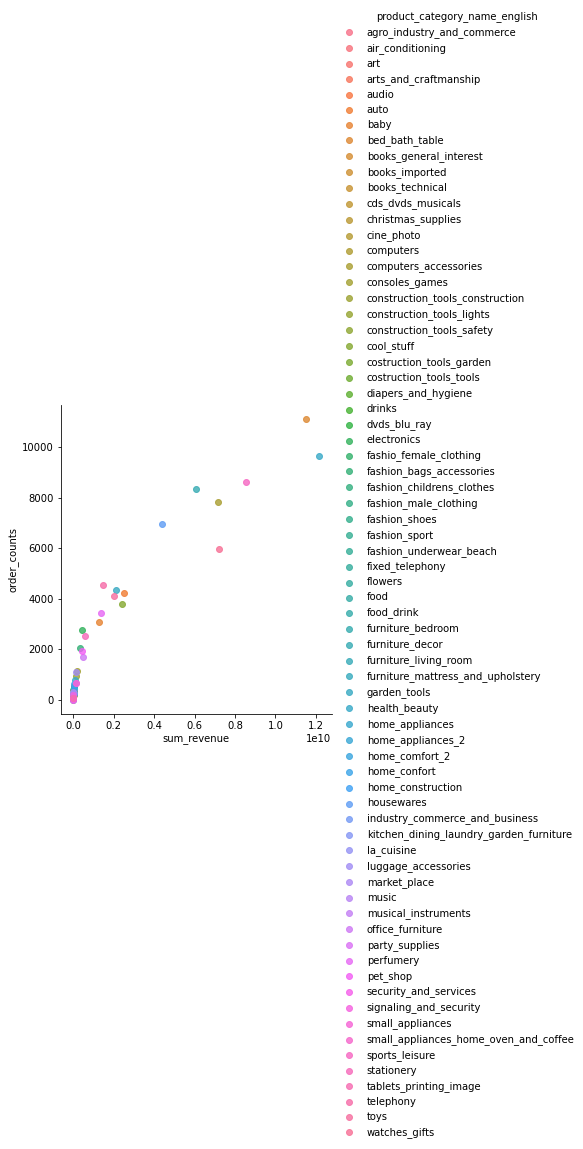

In [60]:
g = sns.lmplot(
    data=all_orders_revenue_product_category,
    x="sum_revenue", y="order_counts", hue="product_category_name_english",
    height=5)


In [ ]:
### Looking at Orders frequency across product categories.

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

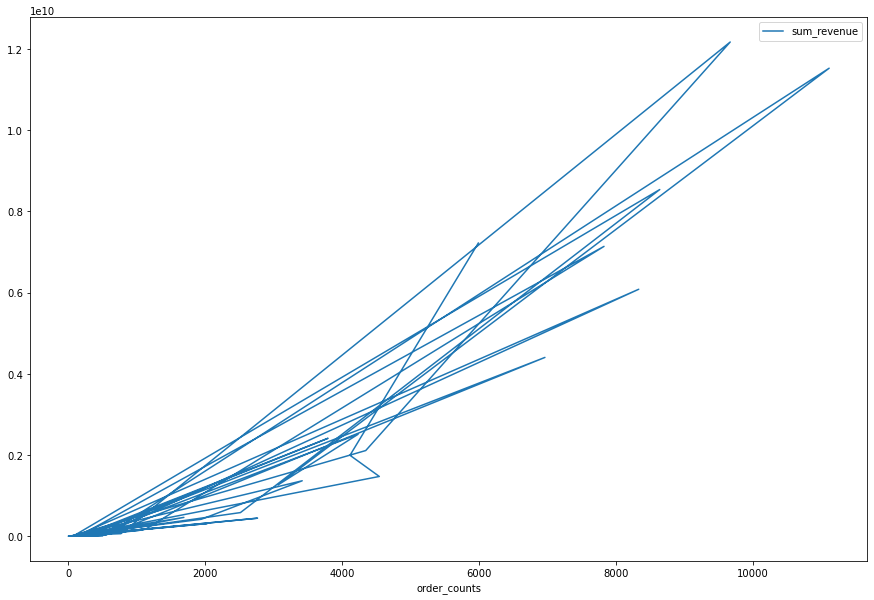

In [75]:

all_orders_revenue_product_category.plot('order_counts').bar()
#plt.plot(all_orders_revenue_product_category[[2]])
plot.xlabel('product_category_name_english')
plt.legend(loc='best')
plt.show()

### Total revenue by Product id 

In [ ]:
orders_product_id_category['item_revenue'] = orders_product_id_category[['product_category_name_english','product_id', 'price']].groupby(['product_id'])['price'].transform('sum')

In [ ]:
Top_orders_product_item_revenue = orders_product_id_category[['product_category_name_english','product_id', 'item_revenue']].groupby(['product_id'])['item_revenue'].sum()

In [ ]:
Top_orders_product_item_revenue = pd.DataFrame(orders_product_id_category[['product_category_name_english','product_id','item_revenue']].groupby(['product_id', 'product_category_name_english'])['item_revenue'].sum()).reset_index()

In [ ]:
Top_orders_product_item_revenue[['product_id','product_category_name_english','item_revenue']].sort_values('item_revenue', ascending=False)

#### Top 5 products with maximum revenue fall under  : 
##### bed_bath_table		
##### furniture_decor
##### computers_accessories, 
##### garden_tool, 
##### health_beauty	